<a href="https://colab.research.google.com/github/Rumaizakosar/Eight-Puzzle-Code/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
url = "https://raw.githubusercontent.com/Rumaizakosar/Eight-Puzzle-Code/main/diabetes.csv"
DP = pd.read_csv(url)

In [ ]:
DP.shape

(768, 9)

In [ ]:
DP.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
DP.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
DP.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
DP.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
import pandas as pd

# Load the Pima Indians Diabetes Database
url = "https://raw.githubusercontent.com/Rumaizakosar/Eight-Puzzle-Code/main/diabetes.csv"
column_names = ['pregnant', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree_function', 'age', 'outcome']
DP = pd.read_csv(url)

# Get the attributes (columns) of the dataset
attributes = DP.columns

print("Attributes (columns) of the PIMA dataset:")
print(attributes)


Attributes (columns) of the PIMA dataset:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


Outliers Detection

In [3]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/Rumaizakosar/Eight-Puzzle-Code/main/diabetes.csv"
column_names = ['pregnant', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree_function', 'age', 'outcome']
DP = pd.read_csv(url, names=column_names)

# Function to detect outliers using IQR method
def detect_outliers(DP):
    outliers = []
    for column in DP.columns:
        if DP[column].dtype != 'object':  # Exclude non-numeric columns
            Q1 = DP[column].quantile(0.25)
            Q3 = DP[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers.extend(DP[(DP[column] < lower_bound) | (DP[column] > upper_bound)].index)
    return outliers

# Find outliers
outliers_indices = detect_outliers(DP)

# Remove outliers
DP_cleaned = DP.drop(outliers_indices)

# Display the outliers
print("Outliers found at indexes:", outliers_indices)
print("Cleaned DataFrame shape:", DP_cleaned.shape)


Outliers found at indexes: []
Cleaned DataFrame shape: (769, 9)


Missing Values

In [ ]:
import pandas as pd

# Load the Pima Indians Diabetes Database
url = "https://raw.githubusercontent.com/Rumaizakosar/Eight-Puzzle-Code/main/diabetes.csv"
DP = pd.read_csv(url)

# Count the number of missing values in each column
missing_values_count = DP.isnull().sum()

print("Number of missing values in each column:")
print(missing_values_count)


Number of missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Normalization

In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the Pima Indians Diabetes Database
url = "https://raw.githubusercontent.com/Rumaizakosar/Eight-Puzzle-Code/main/diabetes.csv"
DP = pd.read_csv(url)

# Extract column names from the DataFrame
attributes = DP.columns[:-1]  # Exclude the 'outcome' column for normalization

# Normalize the dataset
scaler = MinMaxScaler()
DP_normalized = scaler.fit_transform(DP[attributes])
DP_normalized = pd.DataFrame(DP_normalized, columns=attributes)

# Calculate mean and standard deviation after normalization
mean_normalized = DP_normalized.mean()
std_dev_normalized = DP_normalized.std()

print("Mean after normalization:")
print(mean_normalized)
print("\nStandard deviation after normalization:")
print(std_dev_normalized)


Mean after normalization:
Pregnancies                 0.226180
Glucose                     0.607510
BloodPressure               0.566438
SkinThickness               0.207439
Insulin                     0.094326
BMI                         0.476790
DiabetesPedigreeFunction    0.168179
Age                         0.204015
dtype: float64

Standard deviation after normalization:
Pregnancies                 0.198210
Glucose                     0.160666
BloodPressure               0.158654
SkinThickness               0.161134
Insulin                     0.136222
BMI                         0.117499
DiabetesPedigreeFunction    0.141473
Age                         0.196004
dtype: float64


Feature Selection

In [6]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Load the dataset
url = "https://raw.githubusercontent.com/Rumaizakosar/Eight-Puzzle-Code/main/diabetes.csv"
DP = pd.read_csv(url)

# Separate features and target variable
X = DP.iloc[:, :-1]  # Features
y = DP.iloc[:, -1]   # Target variable

# Select features using chi-squared test
best_features = SelectKBest(score_func=chi2, k=4)  # Select top 4 features
fit = best_features.fit(X, y)

# Summarize scores
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(X.columns)
feature_scores = pd.concat([columns, scores], axis=1)
feature_scores.columns = ['Feature', 'Score']

# Print top features
print("Top 4 features:")
print(feature_scores.nlargest(4, 'Score'))


Top 4 features:
   Feature        Score
4  Insulin  2175.565273
1  Glucose  1411.887041
7      Age   181.303689
5      BMI   127.669343


Classification

Confusion Matrix for Decision Tree:
[[78 21]
 [18 37]]


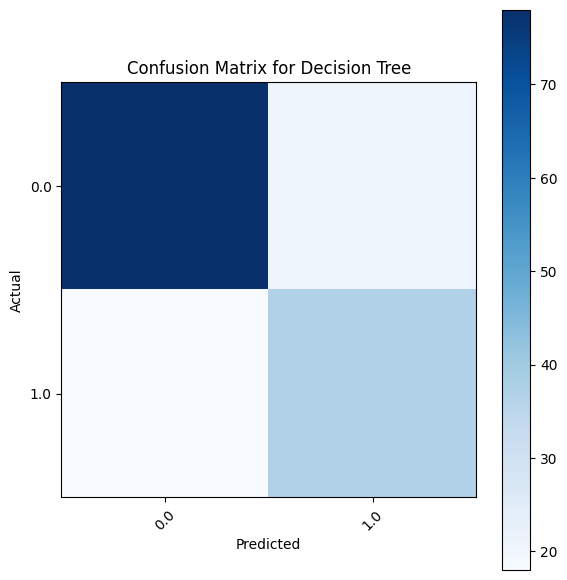

Confusion Matrix for K-Nearest Neighbors:
[[70 29]
 [23 32]]


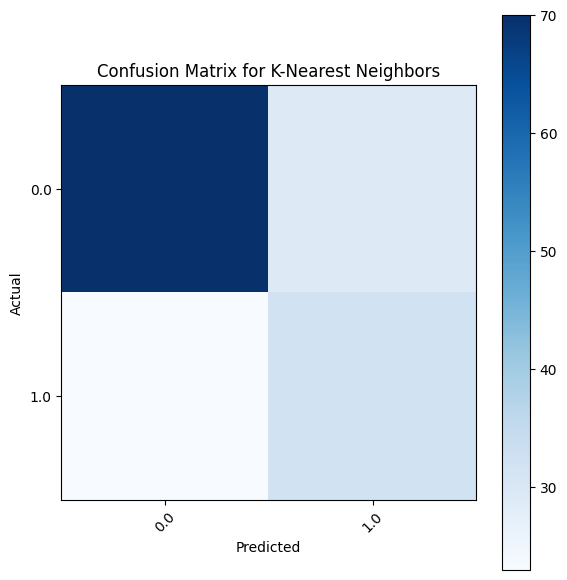

Confusion Matrix for Random Forest:
[[79 20]
 [19 36]]


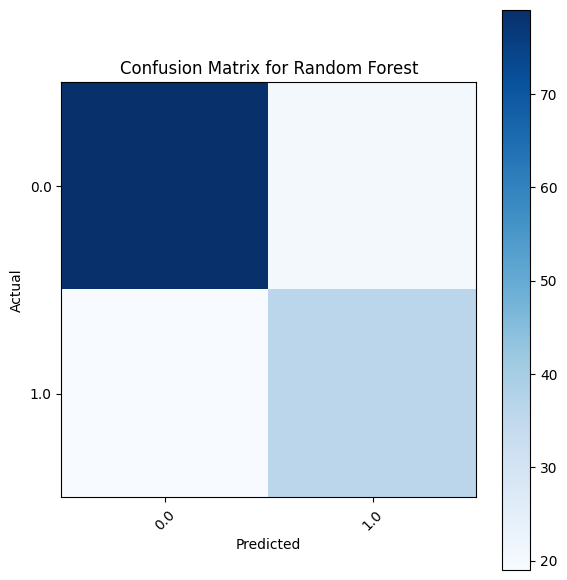

Confusion Matrix for Naive Bayes:
[[79 20]
 [16 39]]


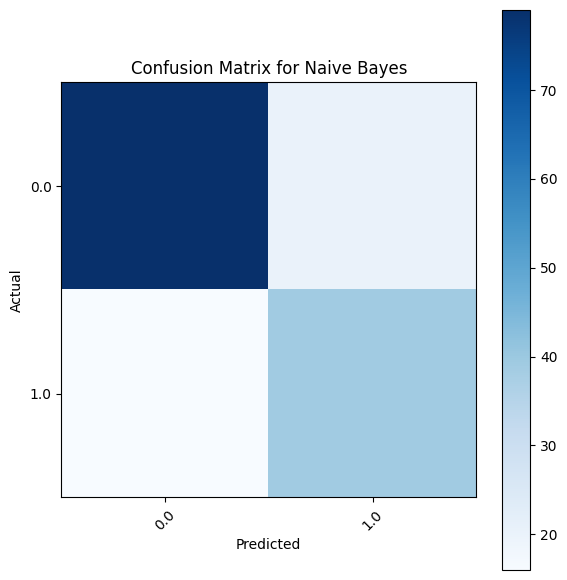

Confusion Matrix for AdaBoost:
[[78 21]
 [20 35]]


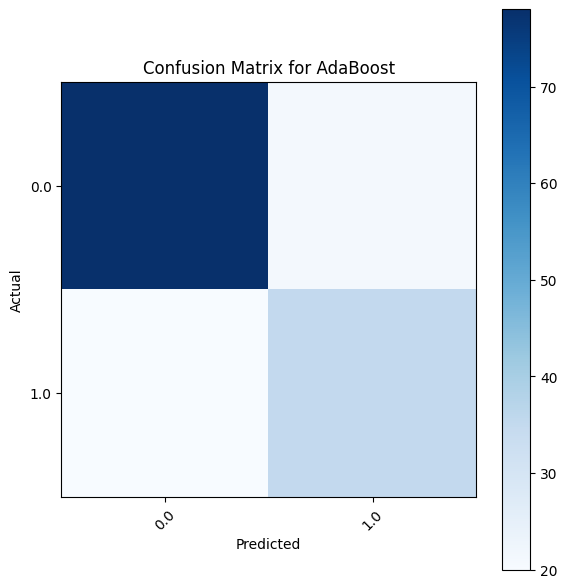

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix for Logistic Regression:
[[78 21]
 [18 37]]


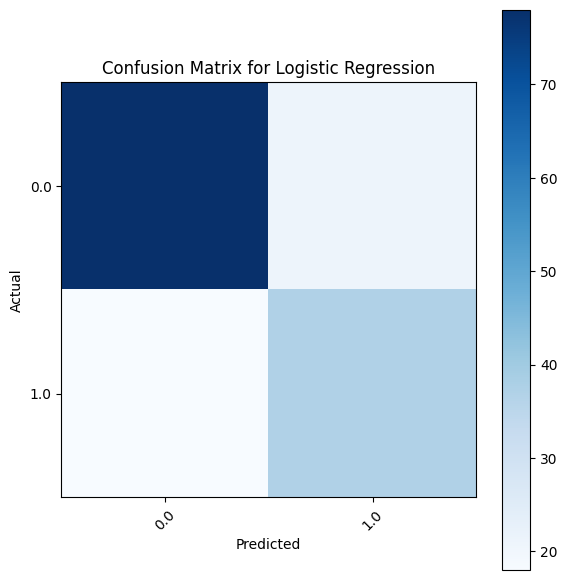

Confusion Matrix for Support Vector Machine:
[[87 12]
 [24 31]]


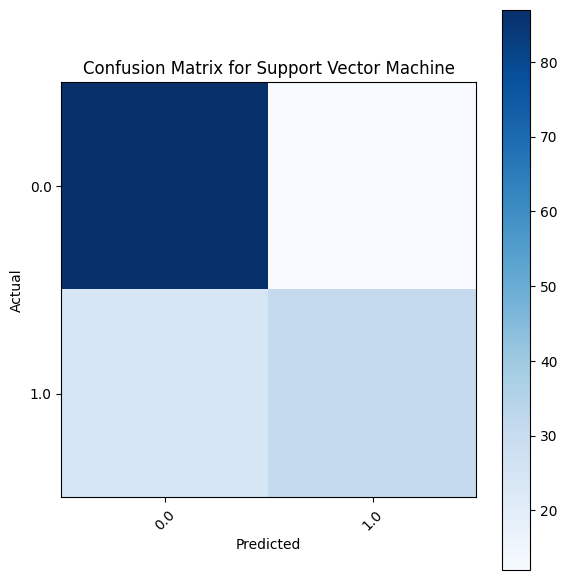

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Load the Pima Indians Diabetes Database
url = "https://raw.githubusercontent.com/Rumaizakosar/Eight-Puzzle-Code/main/diabetes.csv"
DP = pd.read_csv(url)

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
DP_imputed = pd.DataFrame(imputer.fit_transform(DP), columns=DP.columns)

# Split features (X) and target variable (y)
X = DP_imputed.drop(columns=['Outcome']) # Ensure the column name matches exactly
y = DP_imputed['Outcome']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC()
}

# Train and evaluate classifiers
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:")
    print(cm)

    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {name}')
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y)))
    plt.xticks(tick_marks, np.unique(y), rotation=45)
    plt.yticks(tick_marks, np.unique(y))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
import numpy as np

# Load the Pima Indians Diabetes Database
url = "https://raw.githubusercontent.com/Rumaizakosar/Eight-Puzzle-Code/main/diabetes.csv"
DP = pd.read_csv(url)

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
DP_imputed = pd.DataFrame(imputer.fit_transform(DP), columns=DP.columns)

# Split features (X) and target variable (y)
X = DP_imputed.drop(columns=['Outcome']) # Ensure the column name matches exactly
y = DP_imputed['Outcome']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC()
}

# Create an empty list to store the results
results_list = []

# Train and evaluate classifiers
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tp, fp, fn, tn = cm.ravel()
    results_list.append({'Classifier': name, 'TP': tp, 'FP': fp, 'TN': tn, 'FN': fn})

# Convert the list of dictionaries to a DataFrame
results = pd.DataFrame(results_list)

# Display the results as a table
print("Confusion Matrix Results for Each Classifier:")
print(results)


Confusion Matrix Results for Each Classifier:
               Classifier  TP  FP  TN  FN
0           Decision Tree  78  21  38  17
1     K-Nearest Neighbors  70  29  32  23
2           Random Forest  79  20  34  21
3             Naive Bayes  79  20  39  16
4                AdaBoost  78  21  35  20
5     Logistic Regression  78  21  37  18
6  Support Vector Machine  87  12  31  24


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Count

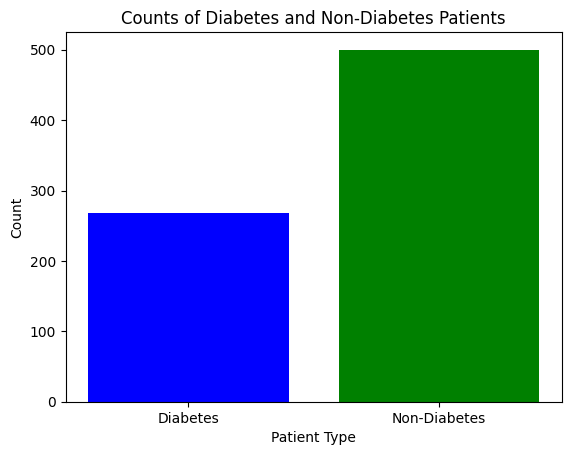

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the Pima Indians Diabetes Database
url = "https://raw.githubusercontent.com/Rumaizakosar/Eight-Puzzle-Code/main/diabetes.csv"
DP = pd.read_csv(url)

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
DP_imputed = pd.DataFrame(imputer.fit_transform(DP), columns=DP.columns)

# Count the number of diabetes and non-diabetes patients
num_diabetes = DP_imputed['Outcome'].sum()  # Sum of 1s (diabetes patients)
num_non_diabetes = len(DP_imputed) - num_diabetes  # Total length - number of diabetes patients

# Plot the counts as a bar graph
labels = ['Diabetes', 'Non-Diabetes']
counts = [num_diabetes, num_non_diabetes]

plt.bar(labels, counts, color=['blue', 'green'])
plt.xlabel('Patient Type')
plt.ylabel('Count')
plt.title('Counts of Diabetes and Non-Diabetes Patients')
plt.show()


Correlation Between Values

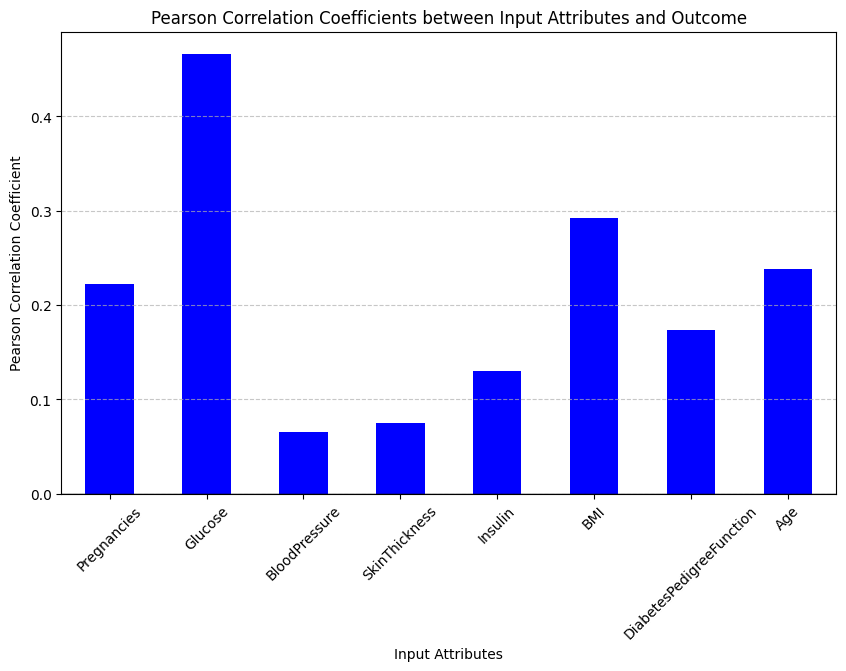

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the Pima Indians Diabetes Database
url = "https://raw.githubusercontent.com/Rumaizakosar/Eight-Puzzle-Code/main/diabetes.csv"
DP = pd.read_csv(url)

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
DP_imputed = pd.DataFrame(imputer.fit_transform(DP), columns=DP.columns)

# Calculate Pearson correlation coefficients between input attributes and the output attribute (Outcome)
correlation_values = DP_imputed.corr()['Outcome'].drop('Outcome')

# Plot the Pearson correlation coefficients as a bar graph
plt.figure(figsize=(10, 6))
correlation_values.plot(kind='bar', color=['red' if val < 0 else 'blue' for val in correlation_values])
plt.xlabel('Input Attributes')
plt.ylabel('Pearson Correlation Coefficient')
plt.title('Pearson Correlation Coefficients between Input Attributes and Outcome')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linewidth=1)  # Add a horizontal line at y=0
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



Build NN with one hidden layer

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the Pima Indians Diabetes Database
url = "https://raw.githubusercontent.com/Rumaizakosar/Eight-Puzzle-Code/main/diabetes.csv"
DP = pd.read_csv(url)

# Split features (X) and target variable (y)
X = DP.drop('Outcome', axis=1)
y = DP['Outcome']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model with one hidden layer
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')


Epoch 1/50
16/16 [==============================] - 1s 17ms/step - loss: 0.6316 - accuracy: 0.6721 - val_loss: 0.6541 - val_accuracy: 0.6423
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6145 - accuracy: 0.6802 - val_loss: 0.6403 - val_accuracy: 0.6504
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5992 - accuracy: 0.6864 - val_loss: 0.6268 - val_accuracy: 0.6585
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5853 - accuracy: 0.6904 - val_loss: 0.6139 - val_accuracy: 0.6667
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5722 - accuracy: 0.7026 - val_loss: 0.6003 - val_accuracy: 0.6667
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5594 - accuracy: 0.7088 - val_loss: 0.5886 - val_accuracy: 0.6748
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5485 - accuracy: 0.7128 - val_loss: 0.5769 - val_accuracy: 0.6748
Epoch 8/50
16/16 [=

K-fold Cross validation

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Load the Pima Indians Diabetes Database
url = "https://raw.githubusercontent.com/Rumaizakosar/Eight-Puzzle-Code/main/diabetes.csv"
DP = pd.read_csv(url)

# Split features (X) and target variable (y)
X = DP.drop('Outcome', axis=1)
y = DP['Outcome']

# Define classification algorithms
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC()
}

# Perform evaluation using K-fold cross-validation
kfold_results = []
for name, clf in classifiers.items():
    pipeline = make_pipeline(StandardScaler(), clf)
    scores = cross_val_score(pipeline, X, y, cv=10, scoring='accuracy')
    mean_accuracy = scores.mean()
    std_deviation = scores.std()
    kfold_results.append([name, mean_accuracy, std_deviation])

# Perform evaluation using Train/Test splitting
splitting_results = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
for name, clf in classifiers.items():
    pipeline = make_pipeline(StandardScaler(), clf)
    pipeline.fit(X_train, y_train)
    accuracy = pipeline.score(X_test, y_test)
    splitting_results.append([name, accuracy])

# Create DataFrames
kfold_df = pd.DataFrame(kfold_results, columns=['Classifier', 'Mean Accuracy (K-fold)', 'Std Deviation (K-fold)'])
splitting_df = pd.DataFrame(splitting_results, columns=['Classifier', 'Accuracy (Train/Test Split)'])

# Print the tables
print("Performance measure using K-fold cross-validation:")
print(kfold_df.to_string(index=False))
print("\nPerformance measure using Train/Test splitting:")
print(splitting_df.to_string(index=False))


Performance measure using K-fold cross-validation:
            Classifier  Mean Accuracy (K-fold)  Std Deviation (K-fold)
         Decision Tree                0.699180                0.059041
   K-Nearest Neighbors                0.739542                0.054706
         Random Forest                0.757809                0.060504
           Naive Bayes                0.756494                0.033037
              AdaBoost                0.755246                0.057137
   Logistic Regression                0.772180                0.036221
Support Vector Machine                0.760390                0.038950

Performance measure using Train/Test splitting:
            Classifier  Accuracy (Train/Test Split)
         Decision Tree                     0.772727
   K-Nearest Neighbors                     0.694805
         Random Forest                     0.746753
           Naive Bayes                     0.766234
              AdaBoost                     0.733766
   Logistic Regressi

Learning Rate

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

# Load the Pima Indians Diabetes Database
url = "https://raw.githubusercontent.com/Rumaizakosar/Eight-Puzzle-Code/main/diabetes.csv"
DP = pd.read_csv(url)

# Split features (X) and target variable (y)
X = DP.drop('Outcome', axis=1)
y = DP['Outcome']

# Define a function to create the model
def create_model(learning_rate=0.01):
    model = Sequential([
        Dense(16, activation='relu', input_shape=(X.shape[1],)),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define a learning rate schedule
def lr_schedule(epoch, lr):
    if epoch < 10:
        return 0.01
    elif epoch < 20:
        return 0.001
    else:
        return 0.0001

# Create the model
model = create_model()

# Define the learning rate scheduler
lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model
history = model.fit(X, y, epochs=30, callbacks=[lr_scheduler])


Epoch 1/30
24/24 [==============================] - 1s 2ms/step - loss: 7.2408 - accuracy: 0.5326 - lr: 0.0100
Epoch 2/30
24/24 [==============================] - 0s 2ms/step - loss: 2.0899 - accuracy: 0.5755 - lr: 0.0100
Epoch 3/30
24/24 [==============================] - 0s 2ms/step - loss: 1.3254 - accuracy: 0.5938 - lr: 0.0100
Epoch 4/30
24/24 [==============================] - 0s 2ms/step - loss: 1.1961 - accuracy: 0.6276 - lr: 0.0100
Epoch 5/30
24/24 [==============================] - 0s 2ms/step - loss: 0.9159 - accuracy: 0.6380 - lr: 0.0100
Epoch 6/30
24/24 [==============================] - 0s 2ms/step - loss: 0.8070 - accuracy: 0.6354 - lr: 0.0100
Epoch 7/30
24/24 [==============================] - 0s 2ms/step - loss: 0.8840 - accuracy: 0.6289 - lr: 0.0100
Epoch 8/30
24/24 [==============================] - 0s 2ms/step - loss: 0.7587 - accuracy: 0.6615 - lr: 0.0100
Epoch 9/30
24/24 [==============================] - 0s 2ms/step - loss: 0.7063 - accuracy: 0.6562 - lr: 0.0100
E

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Load the Pima Indians Diabetes Database
url = "https://raw.githubusercontent.com/Rumaizakosar/Eight-Puzzle-Code/main/diabetes.csv"
DP = pd.read_csv(url)

# Split features (X) and target variable (y)
X = DP.drop('Outcome', axis=1)
y = DP['Outcome']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to create the model
def create_model(hidden_layers, neurons):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_shape=(X_train.shape[1],)))
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=0.01)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define a list of configurations for hidden layers and neurons
configurations = [(1, 8), (1, 16), (2, 8), (2, 16)]  # (hidden layers, neurons)

# Train and evaluate models for each configuration
results = {}
for hidden_layers, neurons in configurations:
    print(f"Training model with {hidden_layers} hidden layer(s) and {neurons} neuron(s)...")
    model = create_model(hidden_layers, neurons)
    history = model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=0)
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    results[(hidden_layers, neurons)] = accuracy

# Print results
print("\nResults:")
for config, accuracy in results.items():
    print(f"Configuration: {config}, Accuracy: {accuracy:.4f}")


Training model with 1 hidden layer(s) and 8 neuron(s)...
Training model with 1 hidden layer(s) and 16 neuron(s)...
Training model with 2 hidden layer(s) and 8 neuron(s)...
Training model with 2 hidden layer(s) and 16 neuron(s)...

Results:
Configuration: (1, 8), Accuracy: 0.7273
Configuration: (1, 16), Accuracy: 0.7078
Configuration: (2, 8), Accuracy: 0.6558
Configuration: (2, 16), Accuracy: 0.6948
